# MSiA 432 - Deep Learning - Final Project
## Group: Alejandra Lelo de Larrea Ibarra, Bannasorn Paspanthong, Ruben Nakano, Samuel Swain
# Style Transfering: Ages

Reference: https://anderfernandez.com/en/blog/how-to-code-neural-style-transfer-in-python/

In [1]:
# Import libraries 
from datetime import datetime
import tensorflow as tf
import numpy as np
from PIL import Image as im 

import keras
from keras import Model
from keras.utils import get_file, plot_model
from keras.optimizers import SGD
from tensorflow.keras.applications import vgg19, vgg16

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

from pathlib import Path
import style_transfering as st

In [2]:
# Try to activate GPUs 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print (f'Found GPU at {device_name}')

Found GPU at /device:GPU:0Metal device set to: Apple M1 Pro



In [3]:
# --- Common Parameters for all experiments ---

# Select base and style image
base_path = Path("../02_Data/face_age/010/755.png")
style_path = Path("../02_Data/face_age/092/202.png")

# Define layers to extract for the style and content 
style_layers = ["block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1", "block5_conv1",]
content_layers = ["block5_conv2"]

# Select pre-trained model
mod_name = "vgg19"
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Dictionary of layers in the model: map layer names to outputs
outputs_dict= dict([(layer.name, layer.output) for layer in model.layers])

# New model: same model inputs, outputs as specified in outputs_dict
feature_extractor = Model(inputs = model.inputs, outputs = outputs_dict)

# Set optimization parameters
learning_rate = 100.0
decay_steps = 100
decay_rate = 0.96
n_iter = 4000

2023-05-13 11:22:24.867124: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Iteration 100: loss=419.68
Iteration 200: loss=304.47
Iteration 300: loss=252.91
Iteration 400: loss=221.98
Iteration 500: loss=201.01
Iteration 600: loss=185.64
Iteration 700: loss=173.82
Iteration 800: loss=164.38
Iteration 900: loss=156.64
Iteration 1000: loss=150.15
Iteration 1100: loss=144.61
Iteration 1200: loss=139.82
Iteration 1300: loss=135.64
Iteration 1400: loss=131.97
Iteration 1500: loss=128.71
Iteration 1600: loss=125.80
Iteration 1700: loss=123.18
Iteration 1800: loss=120.81
Iteration 1900: loss=118.65
Iteration 2000: loss=116.69
Iteration 2100: loss=114.89
Iteration 2200: loss=113.25
Iteration 2300: loss=111.73
Iteration 2400: loss=110.33
Iteration 2500: loss=109.04
Iteration 2600: loss=107.83
Iteration 2700: loss=106.72
Iteration 2800: loss=105.67
Iteration 2900: loss=104.70
Iteration 3000: loss=103.79
Iteration 3100: loss=102.94
Iteration 3200: loss=102.14
Iteration 3300: loss=101.40
Iteration 3400: loss=100.69
Iteration 3500: loss=100.03
Iteration 3600: loss=99.40
It

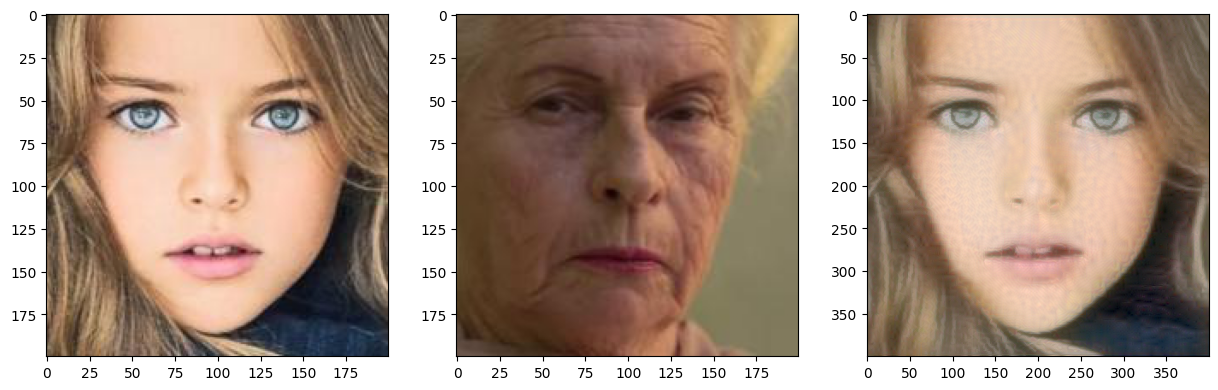

In [4]:
# --- Experiment 1: ----
final_img_path= Path("Results/Ages/Ages_10-80_E1.png")
style_weight = 1e-6
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()


Iteration 100: loss=80.68
Iteration 200: loss=66.40
Iteration 300: loss=59.26
Iteration 400: loss=54.74
Iteration 500: loss=51.55
Iteration 600: loss=49.14
Iteration 700: loss=47.25
Iteration 800: loss=45.71
Iteration 900: loss=44.44
Iteration 1000: loss=43.36
Iteration 1100: loss=42.44
Iteration 1200: loss=41.64
Iteration 1300: loss=40.93
Iteration 1400: loss=40.30
Iteration 1500: loss=39.74
Iteration 1600: loss=39.23
Iteration 1700: loss=38.78
Iteration 1800: loss=38.36
Iteration 1900: loss=37.99
Iteration 2000: loss=37.64
Iteration 2100: loss=37.32
Iteration 2200: loss=37.03
Iteration 2300: loss=36.76
Iteration 2400: loss=36.51
Iteration 2500: loss=36.27
Iteration 2600: loss=36.05
Iteration 2700: loss=35.85
Iteration 2800: loss=35.66
Iteration 2900: loss=35.48
Iteration 3000: loss=35.31
Iteration 3100: loss=35.16
Iteration 3200: loss=35.01
Iteration 3300: loss=34.87
Iteration 3400: loss=34.74
Iteration 3500: loss=34.62
Iteration 3600: loss=34.50
Iteration 3700: loss=34.40
Iteration 

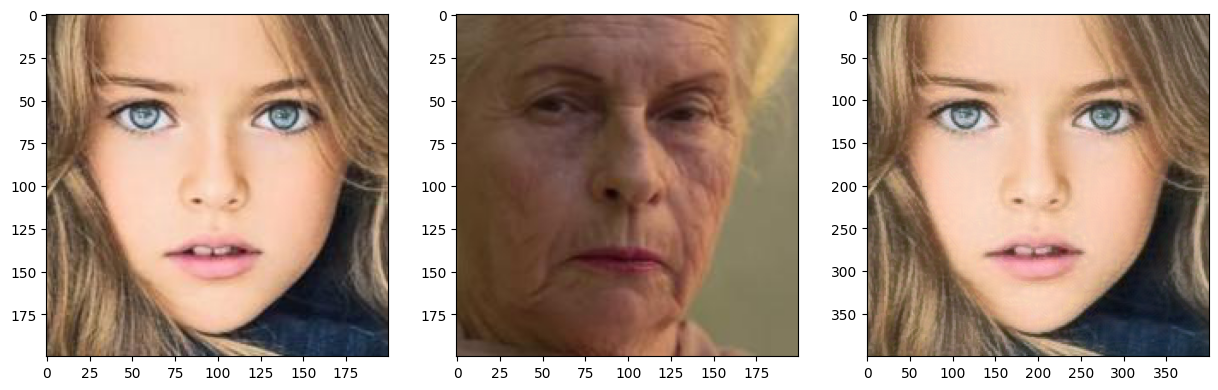

In [5]:
# --- Experiment 2: ----
final_img_path= Path("Results/Ages/Ages_10-80_E2.png")
style_weight = 2.5e-8
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=550.97
Iteration 200: loss=423.66
Iteration 300: loss=365.12
Iteration 400: loss=329.67
Iteration 500: loss=305.30
Iteration 600: loss=287.15
Iteration 700: loss=273.03
Iteration 800: loss=261.69
Iteration 900: loss=252.29
Iteration 1000: loss=244.37
Iteration 1100: loss=237.59
Iteration 1200: loss=231.71
Iteration 1300: loss=226.55
Iteration 1400: loss=222.03
Iteration 1500: loss=218.02
Iteration 1600: loss=214.42
Iteration 1700: loss=211.19
Iteration 1800: loss=208.25
Iteration 1900: loss=205.57
Iteration 2000: loss=203.12
Iteration 2100: loss=200.86
Iteration 2200: loss=198.79
Iteration 2300: loss=196.88
Iteration 2400: loss=195.10
Iteration 2500: loss=193.46
Iteration 2600: loss=191.94
Iteration 2700: loss=190.53
Iteration 2800: loss=189.21
Iteration 2900: loss=187.97
Iteration 3000: loss=186.82
Iteration 3100: loss=185.73
Iteration 3200: loss=184.71
Iteration 3300: loss=183.75
Iteration 3400: loss=182.85
Iteration 3500: loss=182.01
Iteration 3600: loss=181.21
I

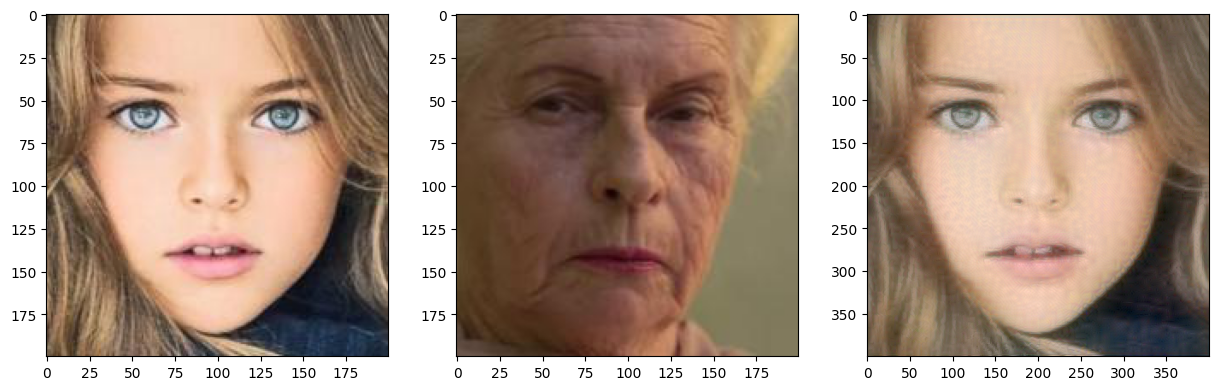

In [6]:
# --- Experiment 3: ----
final_img_path= Path("Results/Ages/Ages_10-80_E3.png")
style_weight = 1e-6
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=61.54
Iteration 200: loss=46.44
Iteration 300: loss=39.62
Iteration 400: loss=35.49
Iteration 500: loss=32.64
Iteration 600: loss=30.53
Iteration 700: loss=28.89
Iteration 800: loss=27.58
Iteration 900: loss=26.50
Iteration 1000: loss=25.59
Iteration 1100: loss=24.81
Iteration 1200: loss=24.14
Iteration 1300: loss=23.55
Iteration 1400: loss=23.03
Iteration 1500: loss=22.57
Iteration 1600: loss=22.15
Iteration 1700: loss=21.78
Iteration 1800: loss=21.44
Iteration 1900: loss=21.14
Iteration 2000: loss=20.86
Iteration 2100: loss=20.60
Iteration 2200: loss=20.36
Iteration 2300: loss=20.14
Iteration 2400: loss=19.94
Iteration 2500: loss=19.76
Iteration 2600: loss=19.58
Iteration 2700: loss=19.42
Iteration 2800: loss=19.27
Iteration 2900: loss=19.13
Iteration 3000: loss=19.00
Iteration 3100: loss=18.88
Iteration 3200: loss=18.76
Iteration 3300: loss=18.65
Iteration 3400: loss=18.55
Iteration 3500: loss=18.45
Iteration 3600: loss=18.36
Iteration 3700: loss=18.28
Iteration 

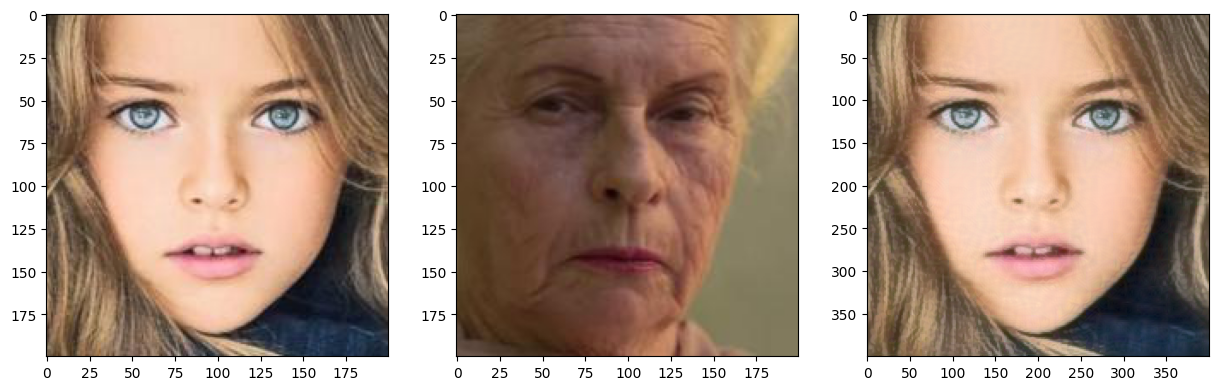

In [7]:
# --- Experiment 4: ----
final_img_path= Path("Results/Ages/Ages_10-80_E4.png")
style_weight = 2.5e-8
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=174799.38
Iteration 200: loss=174799.38
Iteration 300: loss=174799.38
Iteration 400: loss=174799.38
Iteration 500: loss=174799.38
Iteration 600: loss=174799.38
Iteration 700: loss=174799.38
Iteration 800: loss=174799.38
Iteration 900: loss=174799.38
Iteration 1000: loss=174799.38
Iteration 1100: loss=174799.38
Iteration 1200: loss=174799.38
Iteration 1300: loss=174799.38
Iteration 1400: loss=174799.38
Iteration 1500: loss=174799.38
Iteration 1600: loss=174799.38
Iteration 1700: loss=174799.38
Iteration 1800: loss=174799.38
Iteration 1900: loss=174799.38
Iteration 2000: loss=174799.38
Iteration 2100: loss=174799.38
Iteration 2200: loss=174799.38
Iteration 2300: loss=174799.38
Iteration 2400: loss=174799.38
Iteration 2500: loss=174799.38
Iteration 2600: loss=174799.38
Iteration 2700: loss=174799.38
Iteration 2800: loss=174799.38
Iteration 2900: loss=174799.38
Iteration 3000: loss=174799.38
Iteration 3100: loss=174799.38
Iteration 3200: loss=174799.38
Iteration 3300: l

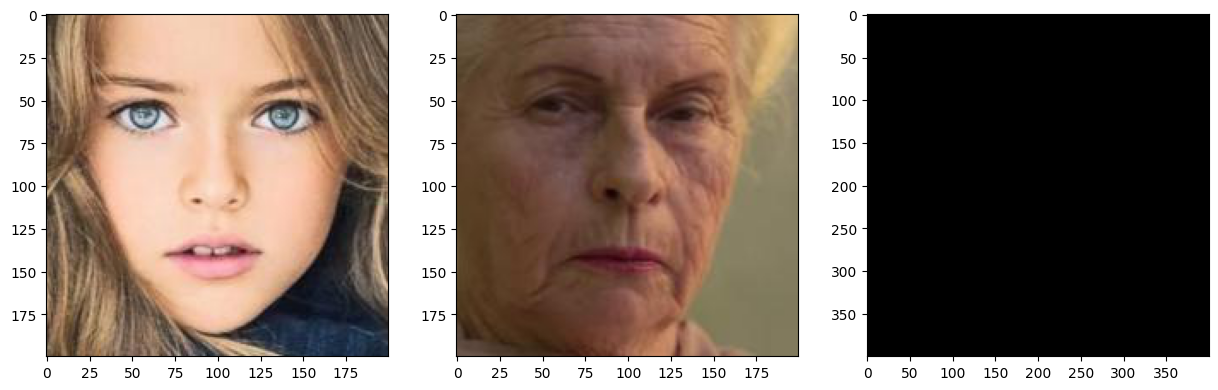

In [8]:
# --- Experiment 5: ----
final_img_path= Path("Results/Ages/Ages_10-80_E5.png")
style_weight = 0.00001
content_weight = 0.0002

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=410.99
Iteration 200: loss=295.10
Iteration 300: loss=243.35
Iteration 400: loss=212.37
Iteration 500: loss=191.38
Iteration 600: loss=176.00
Iteration 700: loss=164.19
Iteration 800: loss=154.77
Iteration 900: loss=147.06
Iteration 1000: loss=140.61
Iteration 1100: loss=135.11
Iteration 1200: loss=130.36
Iteration 1300: loss=126.22
Iteration 1400: loss=122.58
Iteration 1500: loss=119.34
Iteration 1600: loss=116.46
Iteration 1700: loss=113.86
Iteration 1800: loss=111.51
Iteration 1900: loss=109.38
Iteration 2000: loss=107.43
Iteration 2100: loss=105.65
Iteration 2200: loss=104.01
Iteration 2300: loss=102.50
Iteration 2400: loss=101.11
Iteration 2500: loss=99.83
Iteration 2600: loss=98.64
Iteration 2700: loss=97.53
Iteration 2800: loss=96.50
Iteration 2900: loss=95.54
Iteration 3000: loss=94.65
Iteration 3100: loss=93.81
Iteration 3200: loss=93.02
Iteration 3300: loss=92.28
Iteration 3400: loss=91.59
Iteration 3500: loss=90.94
Iteration 3600: loss=90.32
Iteration 370

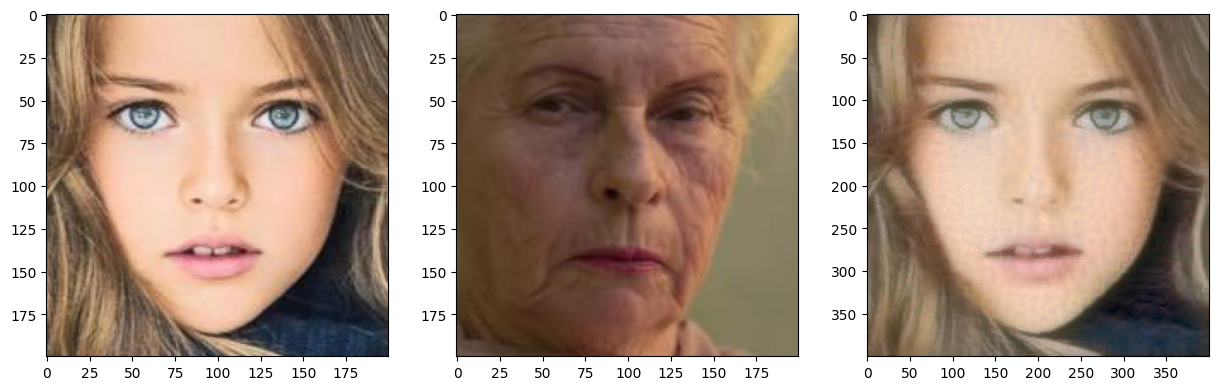

In [9]:
# --- Experiment 5: ----
final_img_path= Path("Results/Ages/Ages_10-80_E5.png")
style_weight = 1e-6
content_weight = 1e-12

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()